In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data-tanaman-padi-lengkap.csv')
df

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
275,Bangka Belitung,2016,20199.46,11726.10,1936.7,76.50,27.74
276,Bangka Belitung,2017,28974.54,15275.46,2068.1,75.12,27.50
277,Bangka Belitung,2018,18951.00,8618.00,1889.8,72.24,27.97
278,Bangka Belitung,2019,57324.00,17841.00,2182.5,81.12,26.03


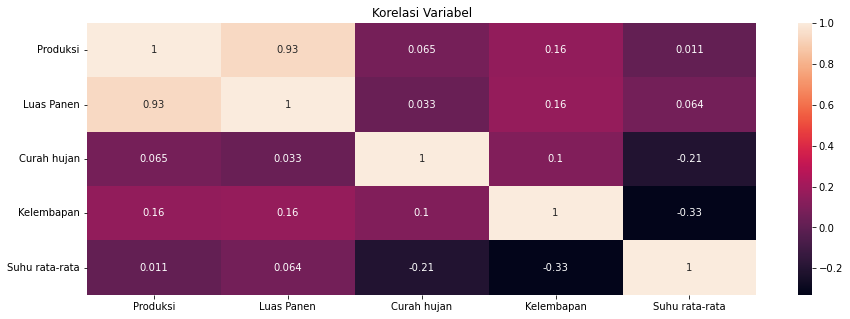

In [4]:
plt.figure(figsize=(15,5))
sns.heatmap(df.drop(columns=['Provinsi','Tahun']).corr(),annot=True);
plt.title("Korelasi Variabel");

In [5]:
def getXandY(provinsi):
    if provinsi not in df['Provinsi'].values:
        return False
    else:
        data = df.loc[df['Provinsi'] == provinsi]
        X = data[['Luas Panen','Curah hujan','Suhu rata-rata']]
        y = data[['Produksi']]
    
        return X,y

In [8]:
class Neural_Network(object):
    def __init__(self):
        # inisisasi nilai input layer, bobot, dan output layer
        self.inputSize = 3
        self.outputSize = 1
        self.hiddenSize = 3

        #bobot
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize)
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) 

    def forward(self, X):
        self.z = np.dot(X, self.W1) 
        self.z2 = self.sigmoid(self.z) 
        self.z3 = np.dot(self.z2, self.W2) 
        o = self.sigmoid(self.z3) 
        return o 

    def sigmoid(self, s):
        # fungsi aktivasi sigmoid
        return 1/(1+np.exp(-s))

    def sigmoidPrime(self, s):
        # fungsi derivatif sigmoid
        return s * (1 - s)

    def backward(self, X, y, o):
        self.o_error = y - o 
        self.o_delta = self.o_error*self.sigmoidPrime(o) 

        self.z2_error = self.o_delta.dot(self.W2.T) 
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) 

        # update nilai bobot
        self.W1 += X.T.dot(self.z2_delta)
        self.W2 += self.z2.T.dot(self.o_delta)

    def train (self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)
        print("Bobot W1:",self.W1)
        print("Bobot W2:",self.W2)        

In [9]:
def normalisasi(data):
    st = MinMaxScaler()
    st.fit(data)
    return st

In [10]:
data_ = {}
iterate = range(0,100)
for i in df['Provinsi'].unique():
    X,y = getXandY(i)
    scalerX = normalisasi(X)
    scalery = normalisasi(y)
    X_scaler = scalerX.transform(X)
    y_scaler = scalery.transform(y)
    X_train,X_test,y_train,y_test = train_test_split(X_scaler,y_scaler,random_state=42,test_size=0.2)
    NN = Neural_Network()
    mape = []
    mse = []
    for j in iterate:
        NN.train(X_train,y_train)
        pred = NN.forward(X_test)
#         loss = mean_absolute_percentage_error(pred,y_test)
        mape.append(mean_absolute_percentage_error(pred,y_test))
        mse.append(mean_squared_error(pred,y_test))
    err = [mape,mse]
    data_[i] =  err 

Bobot W1: [[ 1.34138621 -1.54801521  1.69497323]
 [-1.3622828  -1.50310016 -0.31546527]
 [ 1.70613801  0.83658487 -0.56654691]]
Bobot W2: [[-1.3800984 ]
 [-0.06192174]
 [ 0.10274185]]
Bobot W1: [[ 1.33965929 -1.5474967   1.69471525]
 [-1.36949584 -1.50315532 -0.3151515 ]
 [ 1.70715156  0.83718877 -0.56747013]]
Bobot W2: [[-1.3841099 ]
 [-0.06941409]
 [ 0.11506404]]
Bobot W1: [[ 1.33824539 -1.54690065  1.69439259]
 [-1.37594467 -1.50318848 -0.31486553]
 [ 1.7085376   0.83788027 -0.56853575]]
Bobot W2: [[-1.3901537 ]
 [-0.0778214 ]
 [ 0.12531938]]
Bobot W1: [[ 1.33688094 -1.54622926  1.69403231]
 [-1.38212234 -1.50321554 -0.3145784 ]
 [ 1.70998966  0.83865475 -0.5696974 ]]
Bobot W2: [[-1.39661119]
 [-0.08637899]
 [ 0.13501412]]
Bobot W1: [[ 1.33550446 -1.54548405  1.69364167]
 [-1.38814401 -1.50324008 -0.31428341]
 [ 1.71143612  0.83950919 -0.57094173]]
Bobot W2: [[-1.40310708]
 [-0.09491142]
 [ 0.14449908]]
Bobot W1: [[ 1.33410165 -1.54466617  1.69322272]
 [-1.3940369  -1.50326248 -0.31

Bobot W1: [[ 0.87565431 -2.61030218 -2.08143243]
 [ 0.66140371  1.06115217 -1.46796151]
 [ 0.67677855  0.67878302 -1.16915844]]
Bobot W2: [[ 0.03612842]
 [ 0.91293686]
 [-3.0028675 ]]
Bobot W1: [[ 0.87560954 -2.61238986 -2.0808391 ]
 [ 0.66165247  1.06685737 -1.46790015]
 [ 0.67721603  0.68823991 -1.18174272]]
Bobot W2: [[ 0.03393533]
 [ 0.92237436]
 [-3.03871481]]
Bobot W1: [[ 0.87556818 -2.61455263 -2.0802475 ]
 [ 0.66188481  1.0724467  -1.4676939 ]
 [ 0.67762448  0.69763019 -1.19430601]]
Bobot W2: [[ 0.03169798]
 [ 0.93189004]
 [-3.07443371]]
Bobot W1: [[ 0.8755303  -2.61678923 -2.07965985]
 [ 0.66210063  1.07791915 -1.46734277]
 [ 0.67800368  0.70695141 -1.20684558]]
Bobot W2: [[ 0.02942268]
 [ 0.94147299]
 [-3.11002557]]
Bobot W1: [[ 0.8754959  -2.61909845 -2.07907824]
 [ 0.66229986  1.08327382 -1.4668472 ]
 [ 0.67835351  0.71620105 -1.21935892]]
Bobot W2: [[ 0.02711543]
 [ 0.95111316]
 [-3.14549145]]
Bobot W1: [[ 0.87546495 -2.62147916 -2.07850464]
 [ 0.66248248  1.08850992 -1.46

Bobot W2: [[-0.51498803]
 [ 1.29691144]
 [-0.35680288]]
Bobot W1: [[ 0.19856166 -2.20295435  1.64128565]
 [-1.09123621 -0.54922883  0.70747467]
 [-0.08017415 -1.24194244 -0.13056187]]
Bobot W2: [[-0.51982307]
 [ 1.31871382]
 [-0.3563997 ]]
Bobot W1: [[ 0.19224988 -2.21660015  1.64454925]
 [-1.09298541 -0.5421691   0.7096054 ]
 [-0.07131885 -1.2630363  -0.12147826]]
Bobot W2: [[-0.52477742]
 [ 1.3407093 ]
 [-0.3559612 ]]
Bobot W1: [[ 0.18580341 -2.23039423  1.64777946]
 [-1.09471114 -0.53497495  0.71174191]
 [-0.06243553 -1.2842854  -0.11246687]]
Bobot W2: [[-0.5298538 ]
 [ 1.36288953]
 [-0.35548574]]
Bobot W1: [[ 0.17921908 -2.24433583  1.6509756 ]
 [-1.0964117  -0.52765077  0.71388522]
 [-0.05352373 -1.30568738 -0.10352845]]
Bobot W2: [[-0.53505498]
 [ 1.38524603]
 [-0.35497165]]
Bobot W1: [[ 0.17249369 -2.25842404  1.65413702]
 [-1.09808533 -0.52020127  0.71603632]
 [-0.044583   -1.3272397  -0.09466375]]
Bobot W2: [[-0.54038377]
 [ 1.40777015]
 [-0.35441725]]
Bobot W1: [[ 0.16562401 

Bobot W2: [[-1.5326709 ]
 [ 2.19290964]
 [ 0.20229888]]
Bobot W1: [[-2.0308691   1.32846151 -0.71672807]
 [ 0.94246917  0.75633434  0.17539434]
 [-0.79006192  0.55687244  1.43173722]]
Bobot W2: [[-1.54309282]
 [ 2.1974656 ]
 [ 0.20139848]]
Bobot W1: [[-2.03573455  1.33428846 -0.7159348 ]
 [ 0.94530315  0.75164151  0.17518351]
 [-0.79255154  0.55849179  1.43207419]]
Bobot W2: [[-1.553352  ]
 [ 2.20193589]
 [ 0.20053804]]
Bobot W1: [[-2.04053102  1.34000735 -0.71516406]
 [ 0.94810722  0.74700772  0.17497604]
 [-0.79505923  0.56011839  1.4324068 ]]
Bobot W2: [[-1.56344952]
 [ 2.20632087]
 [ 0.19971671]]
Bobot W1: [[-2.0452584   1.34561969 -0.71441528]
 [ 0.9508809   0.74243318  0.17477186]
 [-0.79758461  0.5617522   1.43273514]]
Bobot W2: [[-1.57338653]
 [ 2.21062096]
 [ 0.19893364]]
Bobot W1: [[-2.04991664  1.35112699 -0.71368788]
 [ 0.95362373  0.73791803  0.17457089]
 [-0.80012728  0.56339312  1.4330593 ]]
Bobot W2: [[-1.58316425]
 [ 2.21483658]
 [ 0.19818797]]
Bobot W1: [[-2.05450575 

Bobot W2: [[-3.54203828]
 [ 1.51171409]
 [-2.38214789]]
Bobot W1: [[-1.90763924  1.49109127 -2.36453566]
 [-1.16762156  0.7559326   0.81834623]
 [ 0.9924197   0.21945186 -1.12332882]]
Bobot W2: [[-3.55972721]
 [ 1.51108391]
 [-2.39838874]]
Bobot W1: [[-1.91539353  1.49363949 -2.37155031]
 [-1.16871296  0.75585118  0.80318731]
 [ 0.99635723  0.22092612 -1.13517694]]
Bobot W2: [[-3.57695262]
 [ 1.51029333]
 [-2.41441418]]
Bobot W1: [[-1.92300575  1.49609591 -2.37839242]
 [-1.16978842  0.75574541  0.78828072]
 [ 1.00014774  0.22246204 -1.1471304 ]]
Bobot W2: [[-3.59373211]
 [ 1.50935383]
 [-2.43023317]]
Bobot W1: [[-1.93048467  1.49846572 -2.38507097]
 [-1.1708484   0.75561678  0.77362721]
 [ 1.00379932  0.22405619 -1.15918266]]
Bobot W2: [[-3.6100825 ]
 [ 1.50827629]
 [-2.44585406]]
Bobot W1: [[-1.93783843  1.50075373 -2.39159431]
 [-1.17189344  0.75546669  0.75922726]
 [ 1.00731985  0.22570529 -1.17132742]]
Bobot W2: [[-3.62601985]
 [ 1.50707101]
 [-2.46128467]]
Bobot W1: [[-1.94507462 

Bobot W1: [[ 0.52537207 -0.99109623 -0.48200818]
 [ 0.74938769 -1.44070762  0.39322241]
 [-2.6025693   0.33345424  0.45590347]]
Bobot W2: [[ 0.88754317]
 [-0.34853956]
 [-1.49957862]]
Bobot W1: [[ 0.54426533 -0.99315099 -0.51107925]
 [ 0.75252591 -1.44082267  0.39309964]
 [-2.59699566  0.33573948  0.45900502]]
Bobot W2: [[ 0.8962041 ]
 [-0.36381919]
 [-1.51011704]]
Bobot W1: [[ 0.56319496 -0.9952497  -0.53988117]
 [ 0.75557099 -1.44094637  0.39327526]
 [-2.59135853  0.33805203  0.46200329]]
Bobot W2: [[ 0.90488774]
 [-0.37868556]
 [-1.52096203]]
Bobot W1: [[ 0.58214747 -0.99738529 -0.56838868]
 [ 0.75852036 -1.44107948  0.39375782]
 [-2.58566169  0.34038386  0.46490809]]
Bobot W2: [[ 0.91358752]
 [-0.39314212]
 [-1.53209224]]
Bobot W1: [[ 0.60110907 -0.99955082 -0.59657743]
 [ 0.76137166 -1.44122289  0.39455494]
 [-2.57990903  0.34272732  0.46772861]]
Bobot W2: [[ 0.92229678]
 [-0.40719243]
 [-1.54348557]]
Bobot W1: [[ 0.62006576 -1.00173954 -0.62442406]
 [ 0.76412272 -1.44137756  0.39

Bobot W1: [[-1.64788745  1.91252967  1.42276239]
 [ 1.88953601  0.98820801 -0.78136013]
 [-0.39242209 -0.71968707 -1.27911986]]
Bobot W2: [[-2.41653565]
 [ 0.5376066 ]
 [ 1.6201827 ]]
Bobot W1: [[-1.64828616  1.91089667  1.42527225]
 [ 1.8977486   0.99041563 -0.78267132]
 [-0.39398782 -0.71540953 -1.27766455]]
Bobot W2: [[-2.41510092]
 [ 0.53887179]
 [ 1.6208469 ]]
Bobot W1: [[-1.64873944  1.90926332  1.4277301 ]
 [ 1.90593377  0.99264404 -0.78397689]
 [-0.39551026 -0.71111671 -1.27625161]]
Bobot W2: [[-2.41366148]
 [ 0.54014675]
 [ 1.62145929]]
Bobot W1: [[-2.80079066 -2.02433135 -0.41494119]
 [ 0.42095881  0.46839832  0.08593637]
 [ 0.29631474 -1.72389036 -0.24670993]]
Bobot W2: [[ 0.31837785]
 [-0.81742752]
 [-0.80594603]]
Bobot W1: [[-2.80027537 -2.03554891 -0.44530258]
 [ 0.40936211  0.4820085   0.09009174]
 [ 0.2857043  -1.70289557 -0.22399611]]
Bobot W2: [[ 0.18666647]
 [-0.88343241]
 [-0.86613641]]
Bobot W1: [[-2.79875049 -2.05217609 -0.48536768]
 [ 0.40548294  0.48549161  0.07

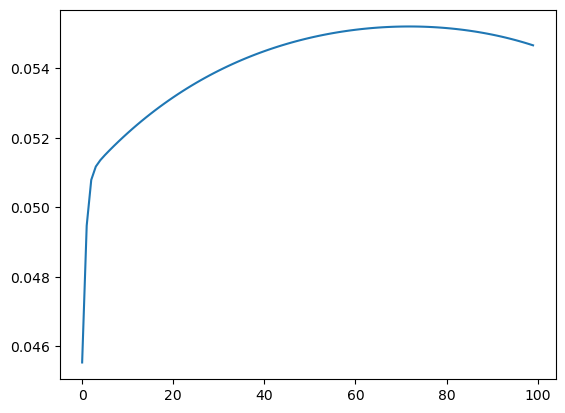

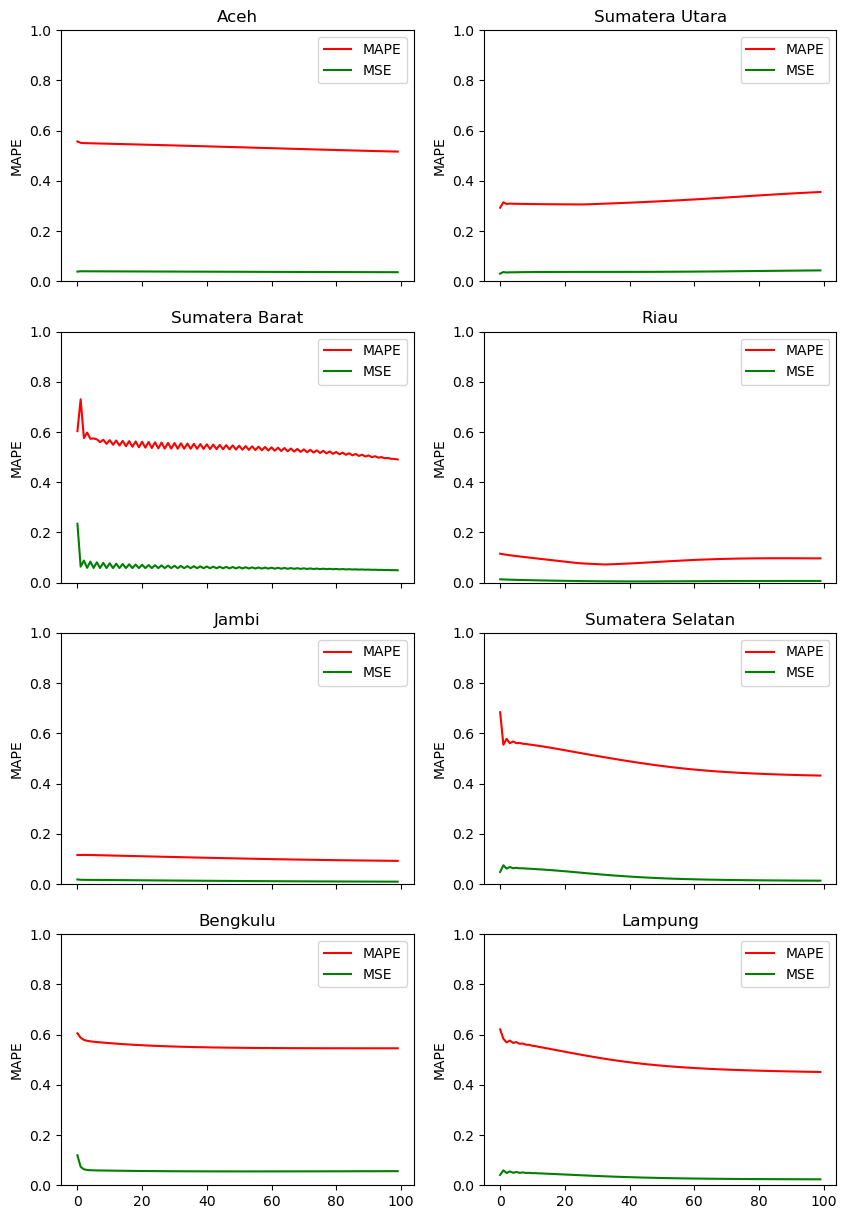

In [169]:
fig,axes = plt.subplots(4,2,figsize=(10,15),sharex=True)
axes = axes.flatten()
cols = list(data_.keys())
# colors = ['b','g','r','c','m','y','k','g']
x = [i for i in iterate]
for i,ax in enumerate(axes):
    ax.plot(x,data_[cols[i]][0],color='r',label='MAPE')
    ax.plot(x,data_[cols[i]][1],color='g',label='MSE')
    ax.set(title=cols[i],ylim=(0,1),ylabel="MAPE")
    ax.legend()

In [170]:
mean_mape = [np.mean(data_[i][0]) for i in data_]
mean_mse = [np.mean(data_[i][1]) for i in data_]

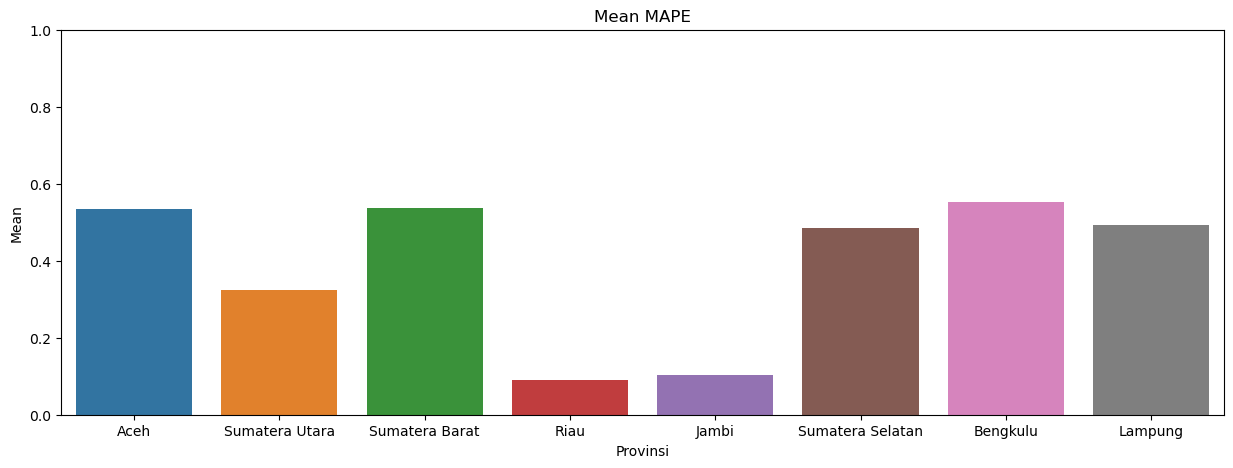

In [196]:
plt.figure(figsize=(15,5))
sns.barplot(x=cols,y=mean_mape)
plt.ylabel('Mean')
plt.title("Mean MAPE")
plt.xlabel("Provinsi")
plt.ylim((0,1));

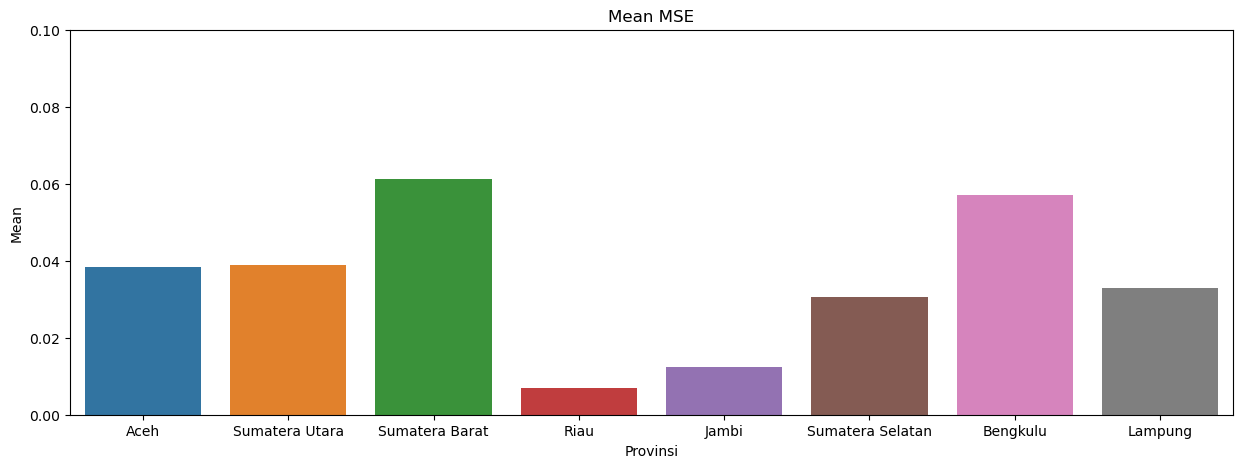

In [195]:
plt.figure(figsize=(15,5))
sns.barplot(x=cols,y=mean_mse)
plt.ylabel('Mean')
plt.title("Mean MSE")

plt.ylim((0,0.1))
plt.xlabel("Provinsi");
# plt.ylim((0,1));

In [190]:
hasil = {"MAPE":mean_mape,'MSE':mean_mse}
hasil = pd.DataFrame(hasil,index=cols)
# hasil.insert(loc=0,column="Provinsi",value=cols)
hasil

,MAPE,MSE
Aceh,0.534217,0.038249
Sumatera Utara,0.323720,0.039015
Sumatera Barat,0.537153,0.061306
Riau,0.090023,0.006844
Jambi,0.102611,0.012293
Sumatera Selatan,0.484712,0.030595
Bengkulu,0.552366,0.057049
Lampung,0.492474,0.033015


In [194]:
print("Rata Rata MAPE di semua provinsi : ",np.mean(hasil['MAPE']))
print("Rata Rata MSE di semua provinsi : ",np.mean(hasil['MSE']))

Rata Rata MAPE di semua provinsi :  0.3896594771224803
Rata Rata MSE di semua provinsi :  0.03479569356809414
